情報理工学院・情報工学系

18M30841

鄭 志豪


problem1-1: Steepest gradient descent method

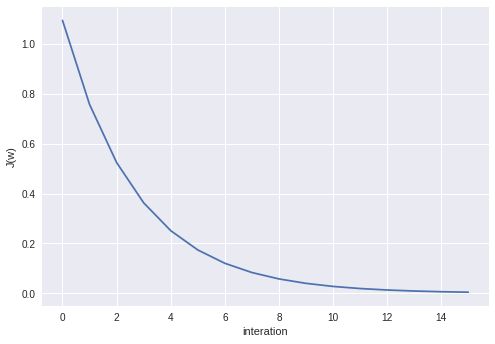

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import math
import random
from matplotlib import pyplot as plt

# learning rate
rate = 0.2
# hyper parameter
ramuda = 1.0  

# data set
n = 40
omega = np.random.randn(1, 1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = 2 * (omega * x[:, 0] + x[:, 1] + noise.T > 0) - 1

w_sgd = np.random.randn(1, 2)
Lip = np.max(np.linalg.eigvals(np.dot(x.T, x) + 2 * ramuda)) / 4
jw_sgd = []

# jw (log-loss)
def jw(y, w, x):
    temp = 0.0
    for i in range(0, len(y)):
        k = -y[0, i] * np.dot(w[0].T, x[i])
        temp += math.log(1 + math.exp(k))
    jw = (1 / n) * temp + ramuda * np.dot(w[0].T, w[0])
    return jw

# djw
def djw(y, w, x):
    temp = 0.0
    for i in range(0, len(y)):
      a = math.exp(-y[0, i] * np.dot(w[0].T, x[i]))
      b = -y[0, i] * x[i]
      temp += (a * b) / (1 + a)
    djw = (1 / n) * temp + 2 * ramuda * w
    return djw

if __name__ == '__main__':
    loss_sgd = jw(y, w_sgd, x)
    jw_sgd.append(loss_sgd)
    for step in range(1, 16):
        d = djw(y, w_sgd, x)
        w_sgd = w_sgd - (1 / Lip) * d
        loss_sgd = jw(y, w_sgd, x)
        jw_sgd.append(loss_sgd)

    plt.plot(jw_sgd)
    plt.xlabel('interation')
    plt.ylabel('J(w)')
    plt.show()